In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
from bs4 import SoupStrainer
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# HW9 

This HW deals with scraping data from https://homeatlastdogrescue.com/adoptable/, a website that has a number of puppies that are available for adoption.

*This is a local area adoption agency. If you want a puppy, ....*

As a first step visit the website and take a look at the raw HTML of that webpage. Remember that in order to do this, you right click on the page and either hit "view page source" or "inspect element".


Now using Beautiful Soup, scrape this website for information that will help you create the following visualizations.

In [31]:
r = requests.get("https://homeatlastdogrescue.com/adoptable/")

In [32]:
soup = BeautifulSoup(r.text, 'html.parser')

## Q1

Plot a pie chart with the percent of male and female dogs that are up for adoption. 


In [33]:
urls = soup.find_all("a", class_ = "details")
len(urls), urls[:5]

(103,
 [<a class="details" href="dog_desc.php?ID=11060" rel="dog_desc.php?ID=11060" title="Dog Detail"><h1>** SAVE A LIFE **</h1></a>,
  <a class="details" href="dog_desc.php?ID=9655" rel="dog_desc.php?ID=9655" title="Dog Detail"><h1>*HELP Ronald Weasley*</h1></a>,
  <a class="details" href="dog_desc.php?ID=11384" rel="dog_desc.php?ID=11384" title="Dog Detail"><h1>Aggie</h1></a>,
  <a class="details" href="dog_desc.php?ID=5632" rel="dog_desc.php?ID=5632" title="Dog Detail"><h1>Alexander</h1></a>,
  <a class="details" href="dog_desc.php?ID=11381" rel="dog_desc.php?ID=11381" title="Dog Detail"><h1>Alice</h1></a>])

In [34]:
fetch_urls = []
for x in urls:
    base_url = 'https://homeatlastdogrescue.com/adoptable/'
    url_str = str(x)
    start = url_str.index('dog_desc')
    end = url_str.index('" rel')
    new_url = url_str[start : end]
    new_url = new_url.strip()
    request_url = base_url + new_url
    fetch_urls.append(request_url)

In [35]:
fetch_urls = fetch_urls[1:]

In [36]:
header_texts = []
dog_soups = []
for x in fetch_urls:
    r = requests.get(x)
    soup = BeautifulSoup(r.text, 'html.parser')
    dog_soups.append(soup)
for x in dog_soups:
    header = x.find('h3').get_text()
    header_texts.append(header)

In [37]:
header_texts[:5]

['Baby Male Cavalier King Charles Spaniel',
 'Baby Female Retriever',
 'Adult Male Shepherd/Australian Shepherd mix\r\n',
 'Baby Female Retriever',
 'Baby Female Labrador Retriever']

In [38]:
genders = []
for x in header_texts:
    split_header = x.split(' ')
    gender = split_header[1]
    genders.append(gender)

In [39]:
dogs = pd.DataFrame({ "Dog" : header_texts, "Gender" : genders})
dogs

,Dog,Gender
0,Baby Male Cavalier King Charles Spaniel,Male
1,Baby Female Retriever,Female
2,Adult Male Shepherd/Australian Shepherd mix\r\n,Male
3,Baby Female Retriever,Female
4,Baby Female Labrador Retriever,Female
5,Baby Male Labrador Retriever,Male
6,Baby Female Retriever,Female
7,Baby Male Hound/Rat Terrier mix\r\n,Male
8,Young Female Pit Bull Terrier,Female
9,Senior Male Chihuahua/Poodle mix\r\n,Male


In [40]:
grouped_genders = dogs.groupby(['Gender'], as_index = False)

In [41]:
dogs_by_gender = grouped_genders.agg({'Dog' : 'count'})
dogs_by_gender = dogs_by_gender.rename(columns = {"Dog" : "number"})

In [42]:
male_vs_female = dogs_by_gender[np.logical_or(dogs_by_gender['Gender'] == 'Female', dogs_by_gender['Gender'] == 'Male')]

In [43]:
male_vs_female

,Gender,number
1,Female,49
2,Male,52


Text(0.5,1,'Percentages of Male and Female Dogs for Adoption')

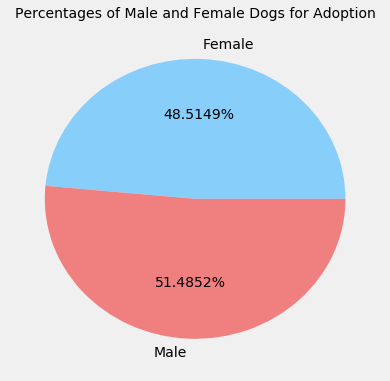

In [44]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (6,6))
sizes = male_vs_female['number']
labels = male_vs_female['Gender']
colors = ["lightskyblue", "lightcoral"]
plt.pie(sizes, labels = labels, colors = colors, autopct='%1.4f%%')
plt.title('Percentages of Male and Female Dogs for Adoption', size = 'medium')

## Q2 

Plot a graph that represents the number of adoptable dogs by breed. For this question please consider the complete breed. 

In [45]:
header_texts[:5]

['Baby Male Cavalier King Charles Spaniel',
 'Baby Female Retriever',
 'Adult Male Shepherd/Australian Shepherd mix\r\n',
 'Baby Female Retriever',
 'Baby Female Labrador Retriever']

In [46]:
breeds = []
for x in header_texts:
    split_header = x.split() #splitting the header with all the info we want
    split_breed = split_header[2:]
    breed = ' '.join(split_breed)
    breeds.append(breed)

In [47]:
len(np.unique(breeds))

45

In [48]:
dogs['breed'] = breeds

In [49]:
dogs[:5]

,Dog,Gender,breed
0,Baby Male Cavalier King Charles Spaniel,Male,Cavalier King Charles Spaniel
1,Baby Female Retriever,Female,Retriever
2,Adult Male Shepherd/Australian Shepherd mix\r\n,Male,Shepherd/Australian Shepherd mix
3,Baby Female Retriever,Female,Retriever
4,Baby Female Labrador Retriever,Female,Labrador Retriever


In [50]:
grouped_breeds = dogs.groupby(['breed'], as_index = False)

In [51]:
dogs_by_breed = grouped_breeds.agg({'Dog' : 'count'})
dogs_by_breed = dogs_by_breed.rename(columns = {'Dog' : 'number'})

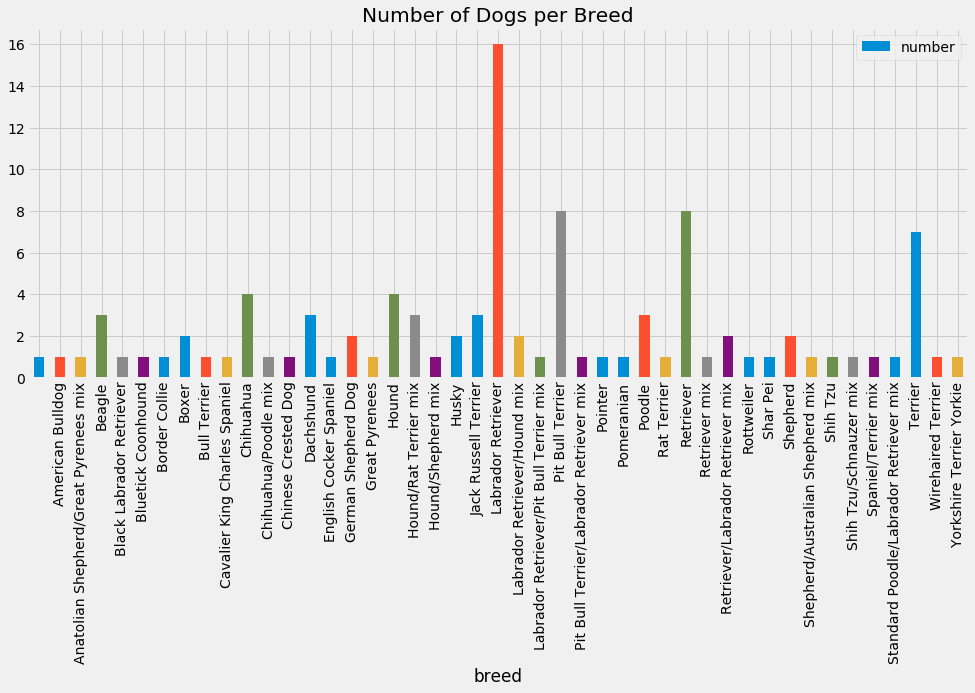

In [53]:
dogs_by_breed.plot.bar(x = 'breed', y = 'number', figsize = (15,6), title = 'Number of Dogs per Breed')


## Q3

How many Labradors are up for adoption? How many Chihuahuas? What percentage of the adoptable dogs do they constitute? For this question, we will consider any dog that has a little bit of Labrador in them to be a Labrador. 
Similar consideration for the Chihuahuas.

#### How many Labradors are up for adoption?

In [54]:
labradors = dogs[dogs['breed'].str.contains('Labrador')]
labradors_percentage = len(labradors) / len(dogs)
print('There are ' + str(len(labradors)) + ' Labradors up for adoption.')
print('The Labradors constitute ' + str(labradors_percentage) + ' percent of the adoptable dogs.')

There are 24 Labradors up for adoption.
The Labradors constitute 0.23529411764705882 percent of the adoptable dogs.


#### How many Chihuahuas?

In [55]:
chihuahuas = dogs[dogs['breed'].str.contains('Chihuahua')]
chihuahuas_percentage = len(chihuahuas) / len(dogs)

print('There are ' + str(len(chihuahuas)) + ' Chihuahuas up for adoption.')
print('The Chihuahuas constitute ' + str(chihuahuas_percentage) + ' percent of the adoptable dogs.')

There are 5 Chihuahuas up for adoption.
The Chihuahuas constitute 0.049019607843137254 percent of the adoptable dogs.


In [211]:
print('Together, the Labs and Chihuahuas constitute ' + str(labradors_percentage + chihuahuas_percentage) + ' percent of the adoptable dogs.')

Together, the Labs and Chihuahuas constitute 0.3675213675213675 percent of the adoptable dogs.


## Q4

Get the names of all the officially recognized breeds as per the akc. 
Start from here http://www.akc.org/dog-breeds/?letter=A

Store this into a dataframe.

Next, use this information to figure out which of the officially recognized breeds shows up most commonly amongst the adoptable dogs (the adoptable dogs as per  https://homeatlastdogrescue.com/adoptable/) 

In [104]:
r = requests.get('https://www.akc.org/dog-breeds/?letter=A')
soup = BeautifulSoup(r.text, 'html.parser')

In [105]:
akc = soup.find_all('option')

In [106]:
akc = akc[1:]

In [107]:
akc_breeds = []
for x in akc:
    akc_breeds.append(x.get_text())

In [109]:
recognized_breeds = pd.DataFrame({'AKC Breeds' : akc_breeds})

In [128]:
recognized_breeds.head(20)

,AKC Breeds
0,Affenpinscher
1,Afghan Hound
2,Airedale Terrier
3,Akita
4,Alaskan Malamute
5,American English Coonhound
6,American Eskimo Dog
7,American Foxhound
8,American Hairless Terrier
9,American Leopard Hound


In [129]:
# merging the AKC dogs df with the dogs-grouped-by-breed df
adoptable_akc = pd.merge(recognized_breeds, dogs_by_breed, left_on= "AKC Breeds", right_on = "breed", how = 'inner')

In [130]:
adoptable_akc.head()

,AKC Breeds,breed,number
0,Beagle,Beagle,3
1,Beagle,Beagle,3
2,Beagle,Beagle,3
3,Bluetick Coonhound,Bluetick Coonhound,1
4,Bluetick Coonhound,Bluetick Coonhound,1


In [131]:
# removing duplicate rows
adoptable_akc = adoptable_akc.drop_duplicates(subset=['breed'], keep='first')

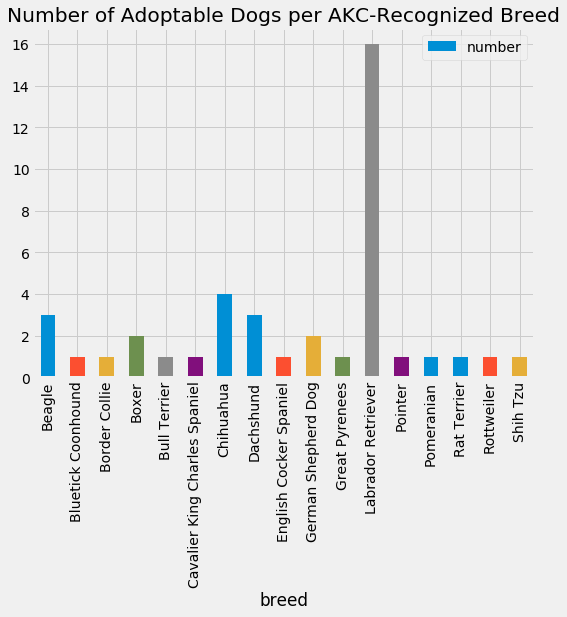

In [132]:
adoptable_akc.plot.bar(x = 'breed', y = 'number', figsize = (8,6), title = 'Number of Adoptable Dogs per AKC-Recognized Breed')

- We can see that, of the officially recognized breeds, the Labrador Retriever shows up most commonly among the adoptable dogs.